# **Fuel Consumption prediction of 2022 car models**

# Import necessary libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Import Dataset

In [2]:
data = pd.read_csv("2022_Cars.csv")
data.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,NaN,7.0,8.6,33.0,200.0,6.0,3.0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         945 non-null    int64  
 1   Make                               945 non-null    object 
 2   Model                              945 non-null    object 
 3   Vehicle Class                      945 non-null    object 
 4   Engine Size(L)                     945 non-null    float64
 5   Cylinders                          945 non-null    int64  
 6   Transmission                       945 non-null    object 
 7   Fuel Type                          944 non-null    object 
 8   Fuel Consumption (City (L/100 km)  931 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   930 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  945 non-null    float64
 11  Fuel Consumption(Comb (mpg))       931 non-null    float64

# Data Pre-processing

In [4]:
df= data.drop(['Model Year','Make','Model','Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (mpg))','CO2 Emissions(g/km)','Smog Rating'],axis=1)

In [5]:
df

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Rating
0,Compact,2.4,4,AM8,Z,8.6,6.0
1,SUV: Small,3.5,6,AS10,Z,11.2,4.0
2,SUV: Small,2.0,4,AS10,Z,9.9,5.0
3,SUV: Small,2.0,4,AS10,Z,10.3,5.0
4,Compact,2.0,4,AS10,Z,9.8,5.0
...,...,...,...,...,...,...,...
940,SUV: Small,2.0,4,AS8,Z,9.4,5.0
941,SUV: Small,2.0,4,AS8,Z,9.4,5.0
942,SUV: Small,2.0,4,AS8,Z,9.9,5.0
943,SUV: Standard,2.0,4,AS8,Z,10.1,5.0


In [6]:
df = df.rename(columns = {'Engine Size(L)':'Engine Size', 'Fuel Consumption(Comb (L/100 km))':'Fuel Consumption'})

In [7]:
df.isna().sum()

Vehicle Class        0
Engine Size          0
Cylinders            0
Transmission         0
Fuel Type            1
Fuel Consumption     0
CO2 Rating          13
dtype: int64

In [8]:
df['Fuel Type'].fillna((df['Fuel Type'].mode()[0]), inplace=True)

In [9]:
df.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating
0,Compact,2.4,4,AM8,Z,8.6,6.0
1,SUV: Small,3.5,6,AS10,Z,11.2,4.0
2,SUV: Small,2.0,4,AS10,Z,9.9,5.0
3,SUV: Small,2.0,4,AS10,Z,10.3,5.0
4,Compact,2.0,4,AS10,Z,9.8,5.0


In [10]:
df[['Fuel Consumption','CO2 Rating']].corr()

,Fuel Consumption,CO2 Rating
Fuel Consumption,1.00000,-0.92762
CO2 Rating,-0.92762,1.00000


In [11]:
df[['Fuel Consumption','CO2 Rating']].groupby('CO2 Rating').median()

,Fuel Consumption
CO2 Rating,
1.0,21.5
2.0,16.0
3.0,13.9
4.0,11.7
5.0,9.9
6.0,8.3
7.0,7.3
8.0,6.0
9.0,4.8


In [12]:
df['CO2 Rating'].fillna(0,inplace=True)
new_ratting = []

for fuel,co2 in zip(df['Fuel Consumption'], df['CO2 Rating']):
    co2_ratings_mapping = {
    (20, float('inf')): 1,
    (16, 20): 2,
    (14, 16): 3,
    (12, 14): 4,
    (10, 12): 5,
    (8, 10): 6,
    (7, 8): 7,
    (6, 7): 8,
    (5, 6): 9,
    (-float('inf'), 5): 10
}

new_rating = df.apply(lambda row: co2_ratings_mapping.get((row['Fuel Consumption'], row['CO2 Rating']), row['CO2 Rating']), axis=1)

df['CO2 Rating'] = new_rating



In [13]:
df.isna().sum()

Vehicle Class       0
Engine Size         0
Cylinders           0
Transmission        0
Fuel Type           0
Fuel Consumption    0
CO2 Rating          0
dtype: int64

# Exploratory Data Analysis

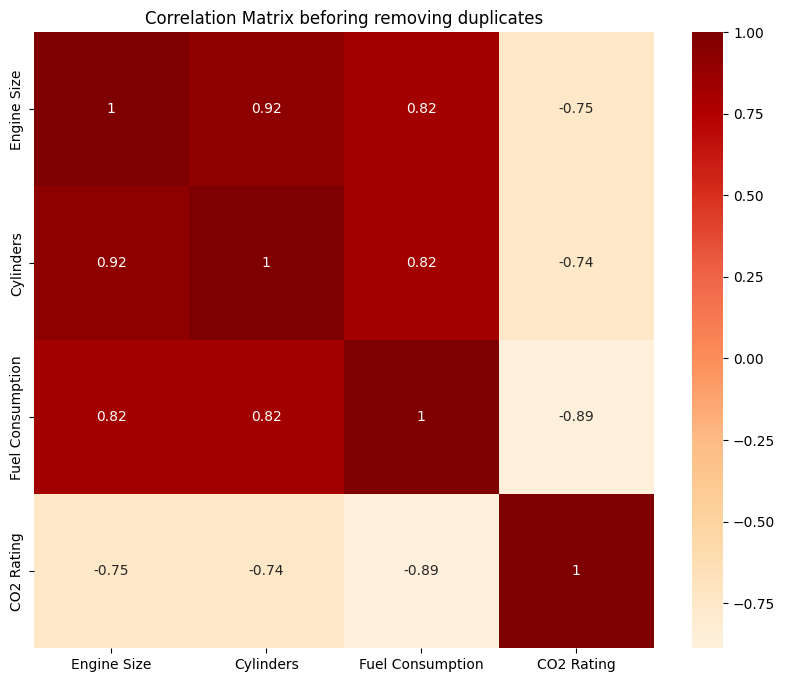

In [14]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='OrRd', center=0)
plt.title('Correlation Matrix beforing removing duplicates')
plt.show()

In [15]:
duplicated_rows = df.duplicated(keep=False)

df[duplicated_rows]

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating
4,Compact,2.0,4,AS10,Z,9.8,5.0
5,Compact,2.0,4,AS10,Z,9.8,5.0
15,Minicompact,5.2,12,A8,Z,13.8,3.0
16,Minicompact,5.2,12,A8,Z,13.8,3.0
24,Subcompact,2.0,4,AM7,Z,8.8,6.0
...,...,...,...,...,...,...,...
935,Mid-size,2.0,4,AS8,Z,9.1,5.0
940,SUV: Small,2.0,4,AS8,Z,9.4,5.0
941,SUV: Small,2.0,4,AS8,Z,9.4,5.0
942,SUV: Small,2.0,4,AS8,Z,9.9,5.0


In [16]:
df = df.drop_duplicates()

df

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating
0,Compact,2.4,4,AM8,Z,8.6,6.0
1,SUV: Small,3.5,6,AS10,Z,11.2,4.0
2,SUV: Small,2.0,4,AS10,Z,9.9,5.0
3,SUV: Small,2.0,4,AS10,Z,10.3,5.0
4,Compact,2.0,4,AS10,Z,9.8,5.0
...,...,...,...,...,...,...,...
937,Station wagon: Small,2.0,4,AS8,Z,9.5,5.0
938,Station wagon: Mid-size,2.0,4,AS8,Z,9.5,5.0
939,SUV: Small,2.0,4,AS8,X,9.3,5.0
940,SUV: Small,2.0,4,AS8,Z,9.4,5.0


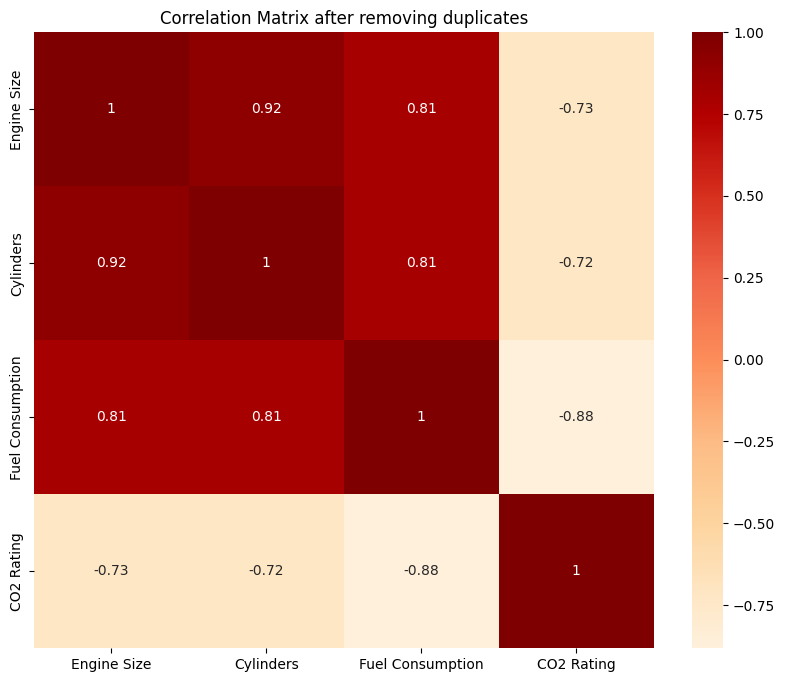

In [17]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='OrRd', center=0)
plt.title('Correlation Matrix after removing duplicates')
plt.show()

In [18]:
for i in df.columns:
    print(i)
    print(df[i].unique(),'\n')

Vehicle Class
['Compact' 'SUV: Small' 'Mid-size' 'Minicompact' 'SUV: Standard'
 'Two-seater' 'Subcompact' 'Station wagon: Small'
 'Station wagon: Mid-size' 'Full-size' 'Pickup truck: Small'
 'Pickup truck: Standard' 'Minivan' 'Special purpose vehicle'] 

Engine Size
[2.4 3.5 2.  3.  2.9 4.  5.2 2.5 6.  4.4 6.6 8.  3.6 1.4 1.2 1.3 2.7 6.2
 2.8 1.5 5.3 5.7 6.4 2.3 3.3 5.  1.8 1.6 3.8 5.6 3.2 6.5 4.6 3.4 3.7 6.7] 

Cylinders
[ 4  6  8 12 10  5 16  3] 

Transmission
['AM8' 'AS10' 'A8' 'A9' 'AM7' 'AS8' 'M6' 'AS6' 'AV' 'AS9' 'A10' 'A6' 'M5'
 'M7' 'AV7' 'AV1' 'AM6' 'AS7' 'AV8' 'AV6' 'AV10' 'AS5' 'A7'] 

Fuel Type
['Z' 'X' 'D' 'E'] 

Fuel Consumption
[ 8.6 11.2  9.9 10.3  9.8 11.   8.7  9.2 11.6  9.3  9.6 12.3 11.5 13.8
 14.6  7.6  8.2  8.8  8.9  9.1 10.  10.6  9.4 10.8 11.7 15.3 11.4 13.7
 13.5 15.4  9.7 10.9 13.9 10.1  9.  13.2 16.3 12.2 16.2 12.5 17.  16.
  8.3 12.  12.6 12.7 12.9 15.1 10.4 15.7 11.1  8.5 22.2 26.1 11.8  7.8
  7.9  9.5 10.2 13.  10.7 14.8 15.2 10.5 14.7 14.9 11.3 12.1 14.1 

In [19]:
df = df.replace({'Transmission' : {'AM8':'AM', 'AS10': 'AS', 'A8':'A', 'A9':'A', 'AM7':'AM', 'AS8':'AS', 'M6':'M',\
                                   'AS6':'AS', 'AS9':'AS', 'A10':'A', 'A6':'A', 'M5':'M', 'M7':'M', 'AV7':'AV', 'AV1':'AV', 'AM6':'AM', 'AS7':'AS', 'AV8':'AV', 'AV6':'AV', 'AV10':'AV', 'AS5':'AS', 'A7':'A'}})
df

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating
0,Compact,2.4,4,AM,Z,8.6,6.0
1,SUV: Small,3.5,6,AS,Z,11.2,4.0
2,SUV: Small,2.0,4,AS,Z,9.9,5.0
3,SUV: Small,2.0,4,AS,Z,10.3,5.0
4,Compact,2.0,4,AS,Z,9.8,5.0
...,...,...,...,...,...,...,...
937,Station wagon: Small,2.0,4,AS,Z,9.5,5.0
938,Station wagon: Mid-size,2.0,4,AS,Z,9.5,5.0
939,SUV: Small,2.0,4,AS,X,9.3,5.0
940,SUV: Small,2.0,4,AS,Z,9.4,5.0


In [20]:
df['Transmission'].unique()

array(['AM', 'AS', 'A', 'M', 'AV'], dtype=object)

In [21]:
df[['Engine Size','Cylinders','Fuel Consumption','CO2 Rating']].describe()

,Engine Size,Cylinders,Fuel Consumption,CO2 Rating
count,745.000000,745.000000,745.000000,745.000000
mean,3.040268,5.451007,10.755168,4.655034
std,1.303187,1.833991,2.801723,1.585529
min,1.200000,3.000000,4.000000,0.000000
25%,2.000000,4.000000,8.900000,4.000000
50%,2.700000,6.000000,10.400000,5.000000
75%,3.600000,6.000000,12.300000,6.000000
max,8.000000,16.000000,26.100000,10.000000


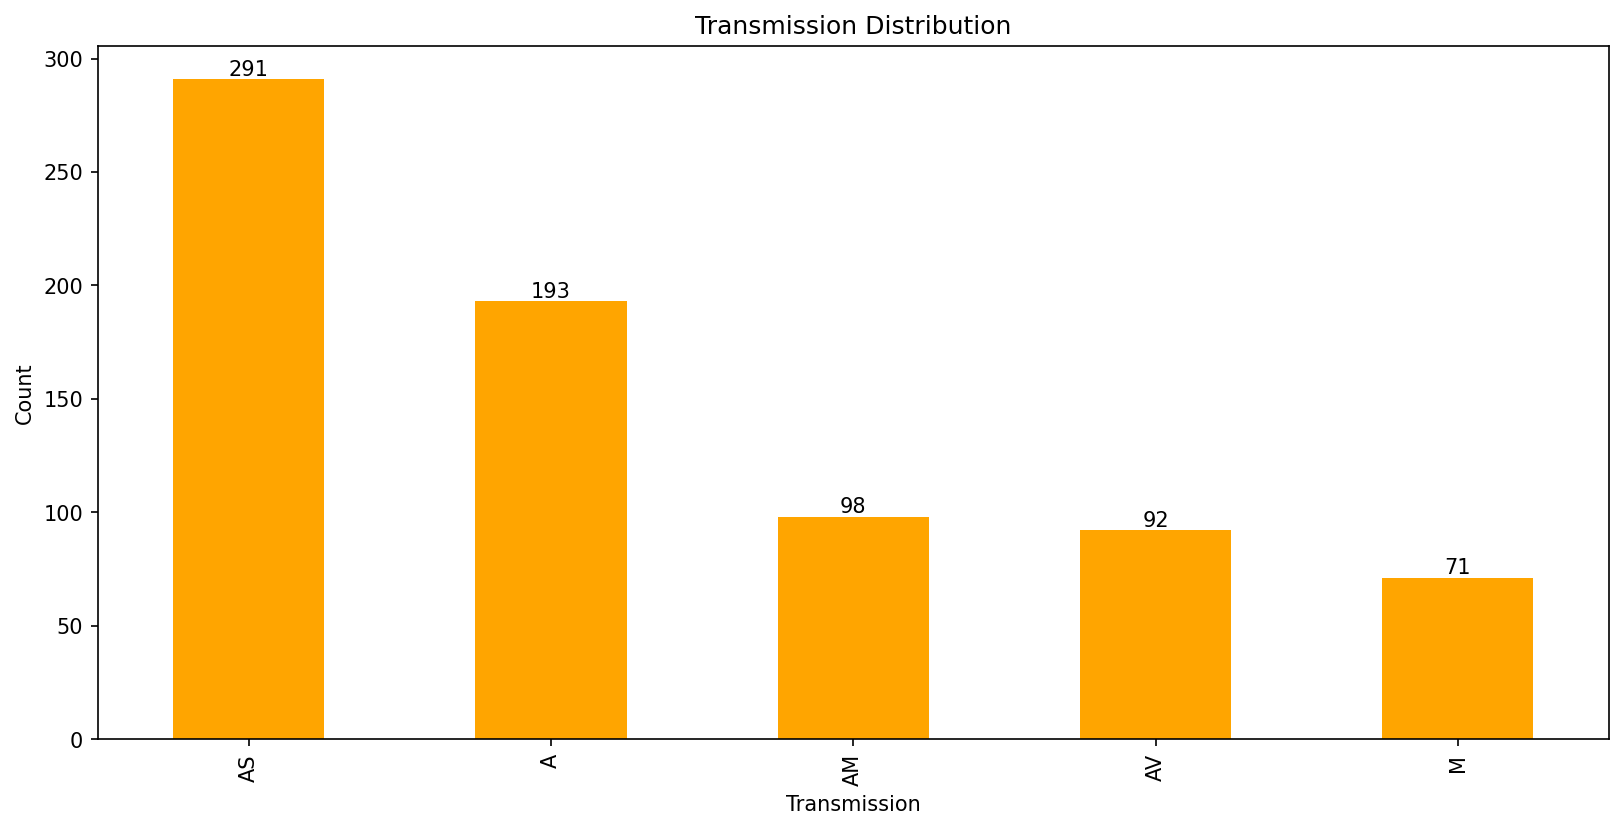

In [22]:
plt.figure(figsize=(13, 6), dpi=150)
transmission_counts = df['Transmission'].value_counts()
ax = transmission_counts.plot.bar(color='orange')

for i, count in enumerate(transmission_counts):
    ax.annotate(str(count), xy=(i, count), ha='center', va='bottom', fontsize=10)

plt.xlabel('Transmission')
plt.ylabel('Count')
plt.title('Transmission Distribution')
plt.show()


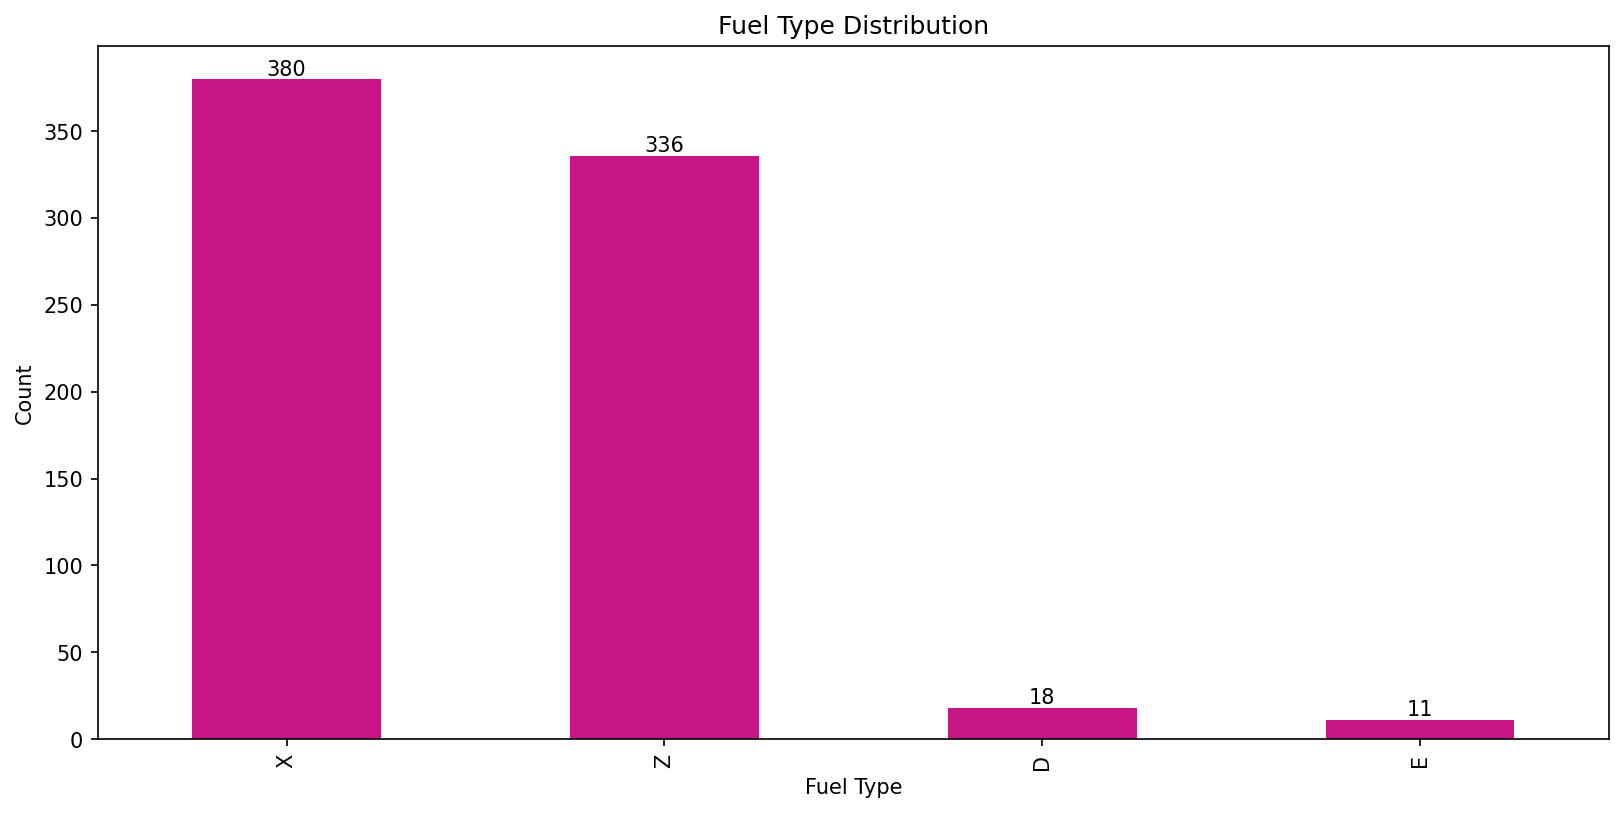

In [23]:
plt.figure(figsize=(13, 6), dpi=150)
transmission_counts = df['Fuel Type'].value_counts()
ax = transmission_counts.plot.bar(color='MediumVioletRed')

for i, count in enumerate(transmission_counts):
    ax.annotate(str(count), xy=(i, count), ha='center', va='bottom', fontsize=10)

plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Fuel Type Distribution')
plt.show()


<Figure size 1950x900 with 0 Axes>

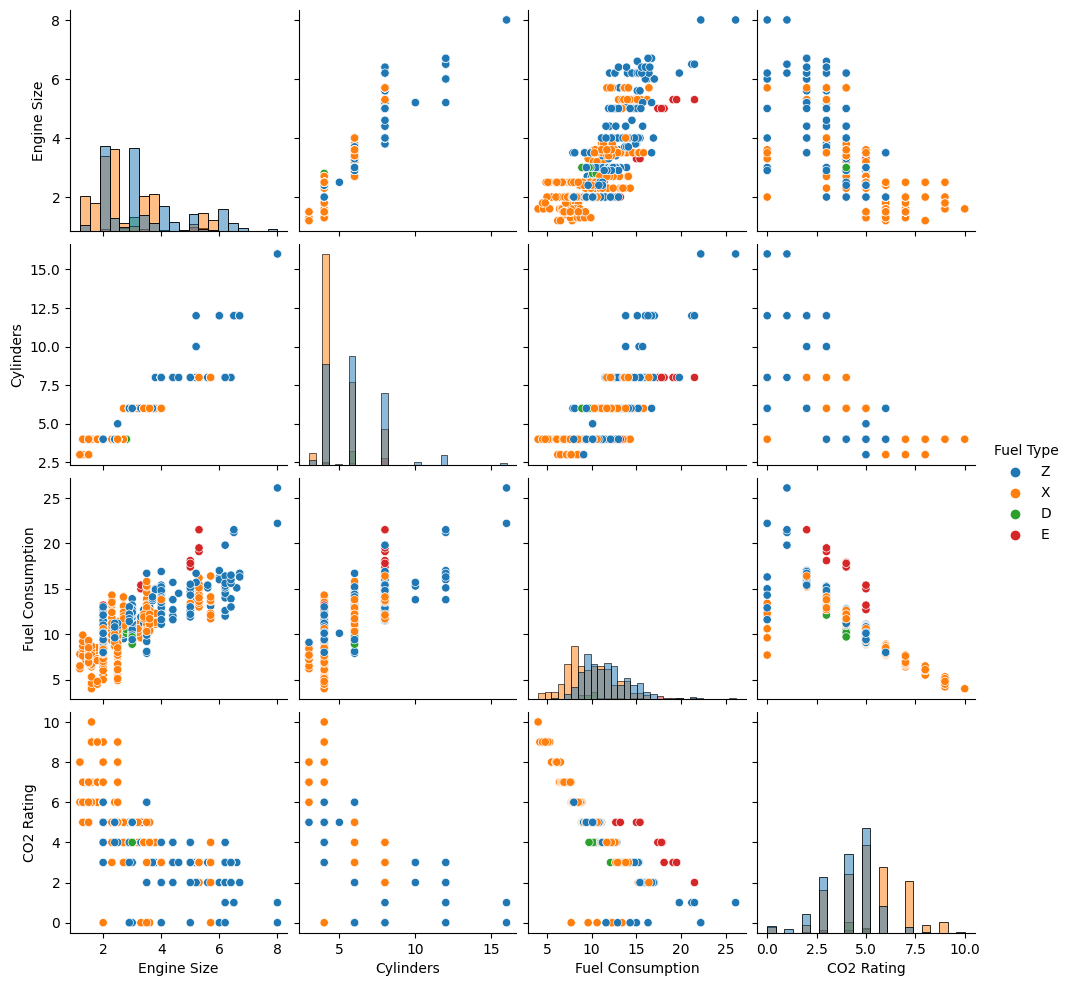

In [24]:
plt.figure(figsize=(13,6), dpi=150)
sns.pairplot(df, hue='Fuel Type',diag_kind='hist')

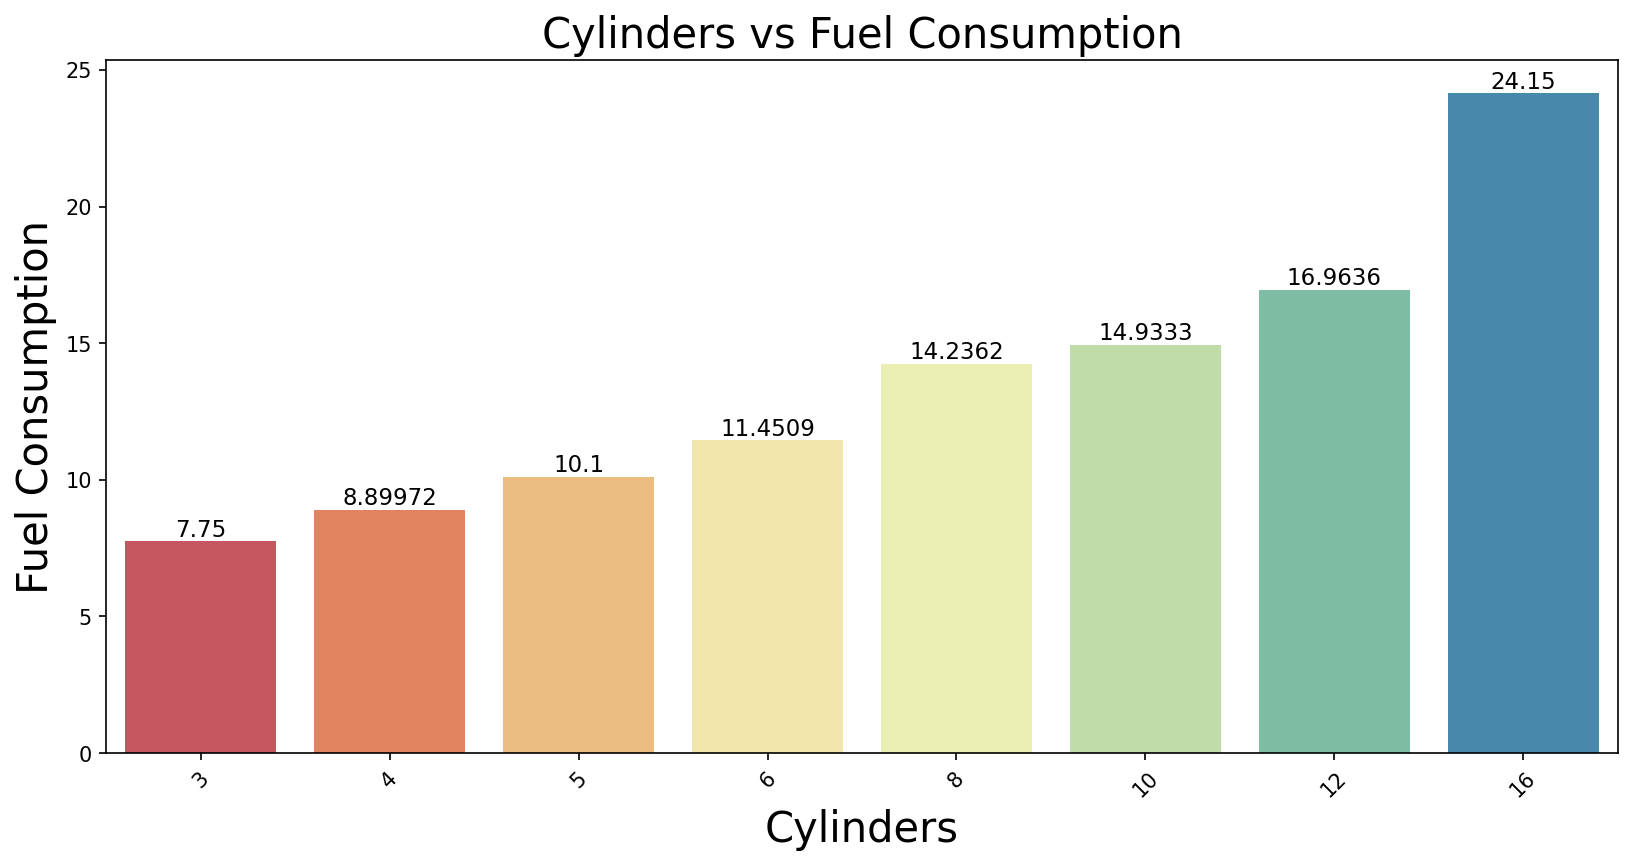

In [26]:
plt.figure(figsize=(13,6), dpi=150)
plt.xticks(rotation=45)
plt.title('Cylinders vs Fuel Consumption',size=20)
fuel_chart=sns.barplot( data=df, x="Cylinders", y="Fuel Consumption",palette='Spectral', ci=None)
plt.xlabel('Cylinders',size=20)
plt.ylabel('Fuel Consumption',size=20)
fuel_chart.bar_label(fuel_chart.containers[0],size=11)
plt.show()

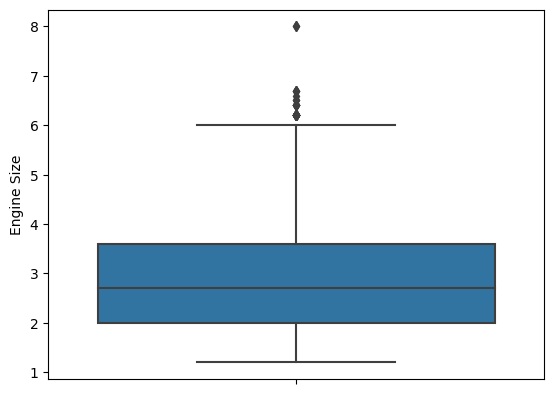

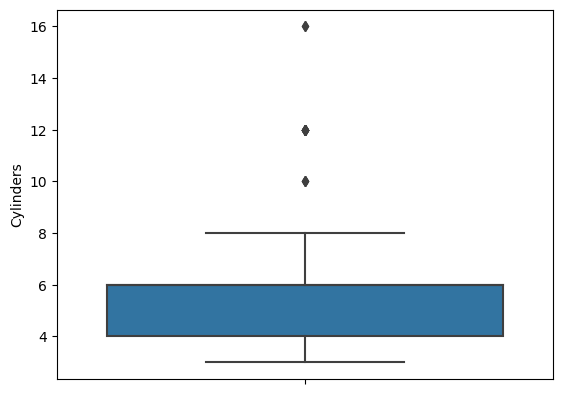

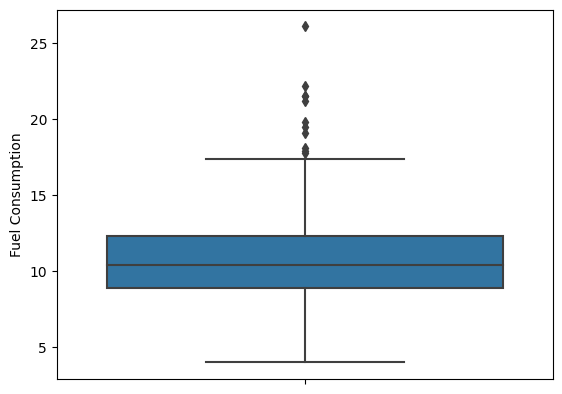

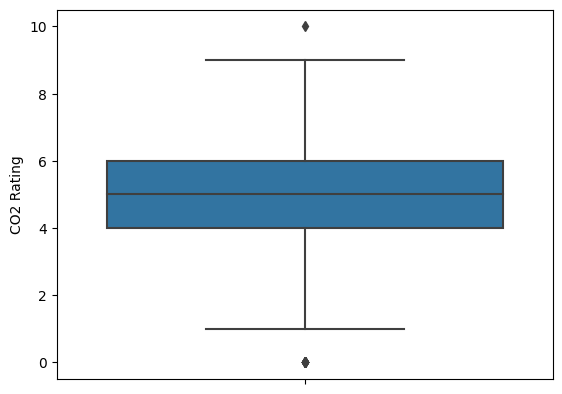

In [27]:
for col in df.columns:
    if df[col].dtypes!= object:
        sns.boxplot(y=col,data=df)
        plt.show()

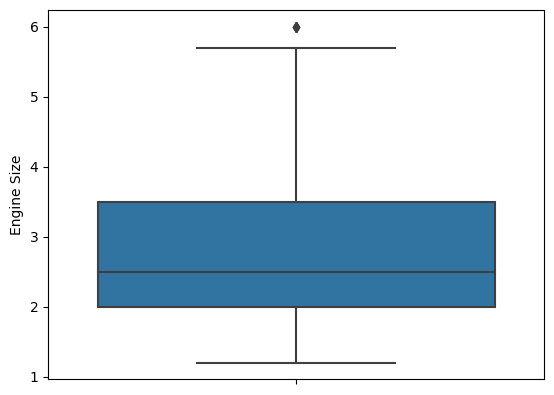

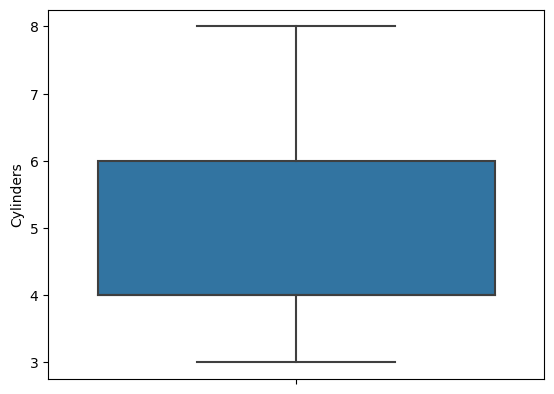

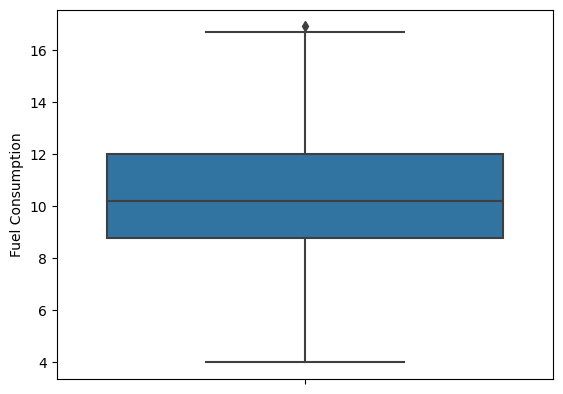

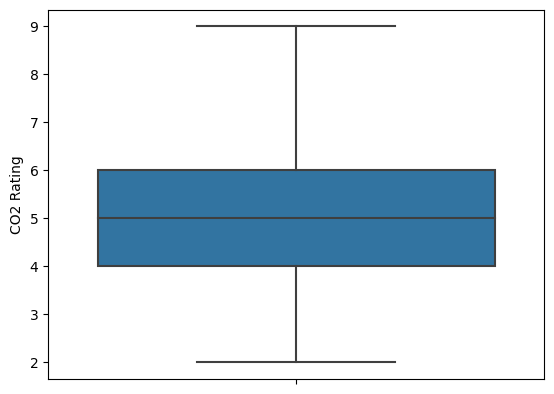

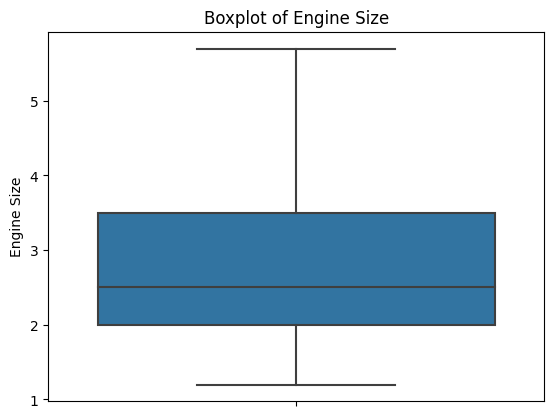

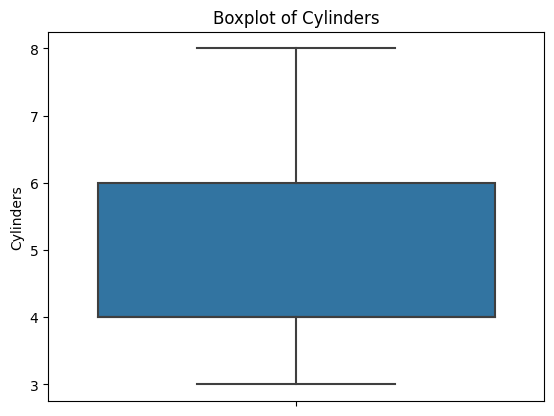

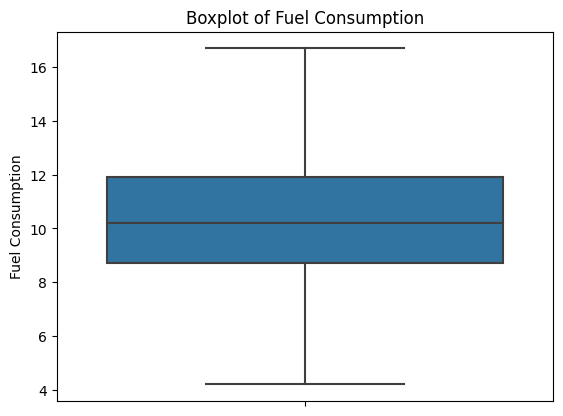

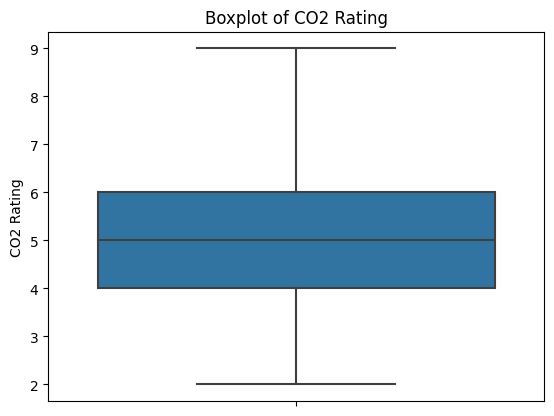

In [28]:
for col in df.columns:
    if df[col].dtypes!= object:
        percentile_25=df[col].quantile(0.25)
        percentile_75=df[col].quantile(0.75)
        IQR=percentile_75-percentile_25
        upper_limit=percentile_75+(1.5*IQR)
        lower_limit=percentile_25-(1.5*IQR)
        df=df[df[col]<=upper_limit]
        df=df[df[col]>=lower_limit]
        plt.figure()
        sns.boxplot(y=col,data=df)


for col in df.select_dtypes(include=[np.number]).columns:
    percentile_25 = df[col].quantile(0.25)
    percentile_75 = df[col].quantile(0.75)
    IQR = percentile_75 - percentile_25

    # Calculate upper and lower limits for outliers
    upper_limit = percentile_75 + (1.5 * IQR)
    lower_limit = percentile_25 - (1.5 * IQR)

    # Filter data within limits
    df_filtered = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]

    # Create a boxplot
    plt.figure()
    sns.boxplot(y=col, data=df_filtered)
    plt.title(f'Boxplot of {col}')
    plt.show()


In [29]:
df.shape

(685, 7)

In [30]:
order = ['AV', 'AM', 'M', 'AS', 'A']

od = OrdinalEncoder(categories = [order])

df["Transmission_X"] = od.fit_transform(df[["Transmission"]])

In [31]:
order = ['Two-seater','Minicompact','Compact','Subcompact','Mid-size','Full-size','SUV: Small','SUV: Standard','Minivan',\
         'Station wagon: Small','Station wagon: Mid-size', 'Pickup truck: Small', 'Special purpose vehicle',\
         'Pickup truck: Standard']

od = OrdinalEncoder(categories = [order])

df["Vehicle Class_X"] = od.fit_transform(df[["Vehicle Class"]])

In [32]:
df.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating,Transmission_X,Vehicle Class_X
0,Compact,2.4,4,AM,Z,8.6,6.0,1.0,2.0
1,SUV: Small,3.5,6,AS,Z,11.2,4.0,3.0,6.0
2,SUV: Small,2.0,4,AS,Z,9.9,5.0,3.0,6.0
3,SUV: Small,2.0,4,AS,Z,10.3,5.0,3.0,6.0
4,Compact,2.0,4,AS,Z,9.8,5.0,3.0,2.0


In [33]:
new_df = df['Fuel Type'].str.get_dummies()

In [34]:
new_df

,D,E,X,Z
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
937,0,0,0,1
938,0,0,0,1
939,0,0,1,0
940,0,0,0,1


In [35]:
df= pd.concat([df,new_df], axis =1)

In [36]:
df.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating,Transmission_X,Vehicle Class_X,D,E,X,Z
0,Compact,2.4,4,AM,Z,8.6,6.0,1.0,2.0,0,0,0,1
1,SUV: Small,3.5,6,AS,Z,11.2,4.0,3.0,6.0,0,0,0,1
2,SUV: Small,2.0,4,AS,Z,9.9,5.0,3.0,6.0,0,0,0,1
3,SUV: Small,2.0,4,AS,Z,10.3,5.0,3.0,6.0,0,0,0,1
4,Compact,2.0,4,AS,Z,9.8,5.0,3.0,2.0,0,0,0,1


In [37]:
x = df.drop(["Fuel Type",'Fuel Consumption',"Vehicle Class","Transmission"], axis = 1)

In [38]:
x.head()

,Engine Size,Cylinders,CO2 Rating,Transmission_X,Vehicle Class_X,D,E,X,Z
0,2.4,4,6.0,1.0,2.0,0,0,0,1
1,3.5,6,4.0,3.0,6.0,0,0,0,1
2,2.0,4,5.0,3.0,6.0,0,0,0,1
3,2.0,4,5.0,3.0,6.0,0,0,0,1
4,2.0,4,5.0,3.0,2.0,0,0,0,1


In [39]:
y= df['Fuel Consumption']

In [40]:
y.head().to_frame()

,Fuel Consumption
0,8.6
1,11.2
2,9.9
3,10.3
4,9.8


In [41]:
#from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= 0.2 , random_state= 51)

In [42]:
xtrain

,Engine Size,Cylinders,CO2 Rating,Transmission_X,Vehicle Class_X,D,E,X,Z
350,2.3,4,5.0,2.0,3.0,0,0,1,0
735,2.5,4,6.0,0.0,6.0,0,0,1,0
453,2.0,4,7.0,0.0,4.0,0,0,1,0
918,3.6,6,4.0,3.0,6.0,0,0,1,0
455,2.0,4,5.0,1.0,4.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
526,3.6,6,4.0,4.0,6.0,0,0,1,0
624,3.0,6,4.0,3.0,0.0,0,0,0,1
727,1.6,4,7.0,0.0,4.0,0,0,1,0
677,3.0,6,5.0,4.0,4.0,0,0,0,1


In [43]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)

In [44]:
xtrain

array([[-0.48093512, -0.79196824,  0.10970892, ..., -0.07419291,
         0.92948673, -0.87620884],
       [-0.29002426, -0.79196824,  0.86121505, ..., -0.07419291,
         0.92948673, -0.87620884],
       [-0.76730141, -0.79196824,  1.61272118, ..., -0.07419291,
         0.92948673, -0.87620884],
       ...,
       [-1.14912313, -0.79196824,  1.61272118, ..., -0.07419291,
         0.92948673, -0.87620884],
       [ 0.1872529 ,  0.57066471,  0.10970892, ..., -0.07419291,
        -1.07586259,  1.14128042],
       [ 1.52362893,  1.93329767, -0.6417972 , ..., -0.07419291,
        -1.07586259,  1.14128042]])

In [45]:
xtest = sc.transform(xtest)

In [46]:
xtest

array([[-0.76730141, -0.79196824,  0.86121505, ..., -0.07419291,
        -1.07586259,  1.14128042],
       [-0.29002426, -0.79196824,  0.86121505, ..., -0.07419291,
         0.92948673, -0.87620884],
       [ 0.75998548,  0.57066471, -1.39330333, ..., -0.07419291,
        -1.07586259,  1.14128042],
       ...,
       [-0.76730141, -0.79196824,  0.86121505, ..., -0.07419291,
        -1.07586259,  1.14128042],
       [ 0.1872529 ,  0.57066471, -0.6417972 , ..., -0.07419291,
         0.92948673, -0.87620884],
       [-1.14912313, -0.79196824,  3.11573344, ..., -0.07419291,
         0.92948673, -0.87620884]])

# Linear Regression

In [47]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [48]:
lr.intercept_

10.373249771813956

In [49]:
print("training score = ",lr.score(xtrain,ytrain))

training score =  0.9412133209586168


In [59]:
ypred_lr = lr.predict(xtest)
r2_score(ytest, ypred_lr)

0.9457650372669383

In [60]:
mae = mean_absolute_error(ytest, ypred_lr)
print(f"Mean Absolute Error (MAE): {mae:.3f}")

mse = mean_squared_error(ytest, ypred_lr)
print(f"Mean Squared Error (MSE): {mse:.3f}")

rmse = mean_squared_error(ytest, ypred_lr, squared=False)  
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

Mean Absolute Error (MAE): 0.487
Mean Squared Error (MSE): 0.344
Root Mean Squared Error (RMSE): 0.586


# Decision Tree Regressor

In [56]:
dc=DecisionTreeRegressor(max_depth=4)
dc.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=4)

In [61]:
print("training score = ",dc.score(xtrain,ytrain))

training score =  0.9508619132931724


In [62]:
ypred_dc=dc.predict(xtest)
r2_score(ytest, ypred_dc)

0.9519808439233731

In [63]:
mae = mean_absolute_error(ytest, ypred_dc)
print(f"Mean Absolute Error (MAE): {mae:.3f}")

mse = mean_squared_error(ytest, ypred_dc)
print(f"Mean Squared Error (MSE): {mse:.3f}")

rmse = mean_squared_error(ytest, ypred_dc, squared=False)  
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

Mean Absolute Error (MAE): 0.448
Mean Squared Error (MSE): 0.304
Root Mean Squared Error (RMSE): 0.552


# Random Forest Regressor


In [66]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [67]:
print("training score = ",rf.score(xtrain,ytrain))

training score =  0.9813226818259992


In [69]:
ypred_rf = rf.predict(xtest)
r2_score(ytest,ypred_rf)

0.9573129797901533

In [70]:
mae = mean_absolute_error(ytest, ypred_rf)
print(f"Mean Absolute Error (MAE): {mae:.3f}")

mse = mean_squared_error(ytest, ypred_rf)
print(f"Mean Squared Error (MSE): {mse:.3f}")

rmse = mean_squared_error(ytest, ypred_rf, squared=False)  
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

Mean Absolute Error (MAE): 0.405
Mean Squared Error (MSE): 0.271
Root Mean Squared Error (RMSE): 0.520


# XG Boost Regressor

In [71]:
xg = XGBRegressor(n_estimators = 9,max_depth=2,eta=0.89,subsample=0.8,num_parallel_tree=11)
xg.fit(xtrain,ytrain)
ypred_xg = xg.predict(xtest)
r2_score(ytest,ypred_xg)

0.9575404627606433

In [72]:
mae = mean_absolute_error(ytest, ypred_xg)
print(f"Mean Absolute Error (MAE): {mae:.3f}")

mse = mean_squared_error(ytest, ypred_xg)
print(f"Mean Squared Error (MSE): {mse:.3f}")

rmse = mean_squared_error(ytest, ypred_xg, squared=False)  
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

Mean Absolute Error (MAE): 0.424
Mean Squared Error (MSE): 0.269
Root Mean Squared Error (RMSE): 0.519


# Light GBM Regressor

In [73]:
lgbm = LGBMRegressor(n_estimators=50,max_depth=6,learning_rate=0.4)
lgbm.fit(xtrain,ytrain)
ypred_lgbm = lgbm.predict(xtest)
r2_score(ytest,ypred_lgbm)

0.8896315370211504

In [74]:
mae = mean_absolute_error(ytest, ypred_lgbm)
print(f"Mean Absolute Error (MAE): {mae:.3f}")

mse = mean_squared_error(ytest, ypred_lgbm)
print(f"Mean Squared Error (MSE): {mse:.3f}")

rmse = mean_squared_error(ytest, ypred_lgbm, squared=False)  
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

Mean Absolute Error (MAE): 0.603
Mean Squared Error (MSE): 0.699
Root Mean Squared Error (RMSE): 0.836


# Deployment

In [75]:
import os
import pickle as pk

In [76]:
filename = "scaled.sav"
pk.dump(sc, open(filename, "wb"))
loaded_scaler = pk.load(open("scaled.sav", "rb"))

In [77]:
trail_inputs = ["Full-size",2.4,4,"A",6.0,"Z"]    # input example

In [78]:
filename = "xgboost.sav"
pk.dump(xg, open(filename, "wb"))
loaded_model = pk.load(open("xgboost.sav", "rb"))

In [79]:
def input_converter(trail_inputs):
    vcl = ['Two-seater','Minicompact','Compact','Subcompact','Mid-size','Full-size','SUV: Small','SUV: Standard','Minivan','Station wagon: Small','Station wagon: Mid-size','Pickup truck: Small','Special purpose vehicle','Pickup truck: Standard']
    trans = ['AV','AM','M','AS','A']
    fuel = ["D","E","X","Z"]

    def fuel_encoding(fuel_type):
        fuel_mapping = {'D': [1, 0, 0, 0], 'E': [0, 1, 0, 0], 'X': [0, 0, 1, 0], 'Z': [0, 0, 0, 1]}
        return fuel_mapping.get(fuel_type, [0, 0, 0, 0])

    lst = []
    for input_item in trail_inputs:
        if isinstance(input_item, str):
            if input_item in vcl:
                lst.append(vcl.index(input_item))
            elif input_item in trans:
                lst.append(trans.index(input_item))
            elif input_item in fuel:
                lst.extend(fuel_encoding(input_item))
        else:
            lst.append(input_item)

    arr = np.asarray(lst).reshape(1, -1)
    arr = loaded_scaler.transform(arr)
    prediction = loaded_model.predict(arr)

    return f"The Fuel Consumption L/100km is {prediction[0]:.2f}"

input_converter(trail_inputs)


'The Fuel Consumption L/100km is 11.55'